## Part I: CrossChatH

### Load required packages

In [2]:
import crosschat as cc
import scanpy as sc
import numpy as np

/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packag

### Load data and preprocess
You can choose to use your own hierarchical clustering result as input. Please load your clustering result as the format of user_comm_ids below.

In [2]:
# You can download the data from this link: https://drive.google.com/drive/folders/1NU8htAxVHrEiNV7YqSzEkHFGBnM6vNlM
adata = sc.read_h5ad('../src/crosschat/data/covid3000.h5ad')
# user_comm_ids = np.load('../src/crosschat/data/user_comm_ids.npy')
ccH_obj = cc.CrossChatH(adata,species="human",user_comm_ids=None)
ccH_obj.prepare_adata(normalize=False, scale=True, input='allgenes')

### Perform Multiscale clustering
To reduce noise, one can increase parameter values for `window_size` and `basin_radius`

In [3]:
#Change cluster_by to "l" or "r" if you want to cluster based on ligands/receptors only.
ccH_obj.Multsicale_clustering(cluster_by="allgenes")

100%|██████████| 100/100 [00:15<00:00,  6.66it/s]
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


### Draw clustering results
You do not need to run select_partitions if you use your own hierarchical clustering.

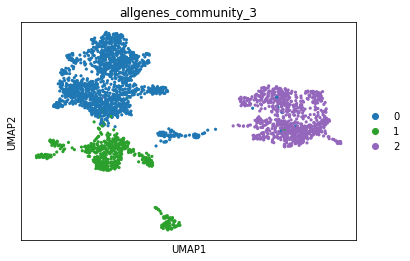

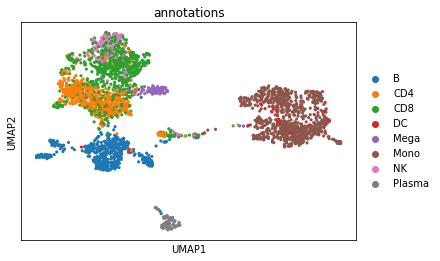

In [4]:
ccH_obj.select_partitions(window_size=15, basin_radius=15, lr = "L")
# If you would like to use your own hierarchical clustering, change cluster_input to "userinput"
ccH_obj.Draw_multiscale_umap(cluster_input="allgenes",spatial=False)
ccH_obj.Draw_annotations_umap()

### Find specific LR pairs

In [5]:
# Table of top 20 most specific ligand-receptor interactions
top20_specific_LR = ccH_obj.Detect_specific_LRs(topN=20)

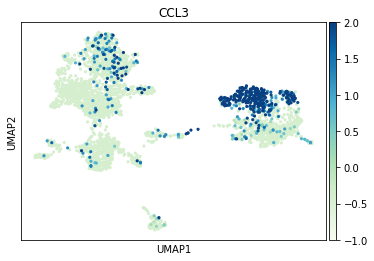

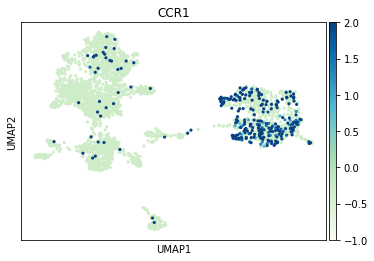

In [6]:
gene_ls = ['CCL3','CCR1']
for gene in gene_ls:
    sc.pl.umap(ccH_obj.adata, color=f"{gene}",cmap='GnBu',vmin=-1,vmax=2)

### Draw CCC of specific LR pairs

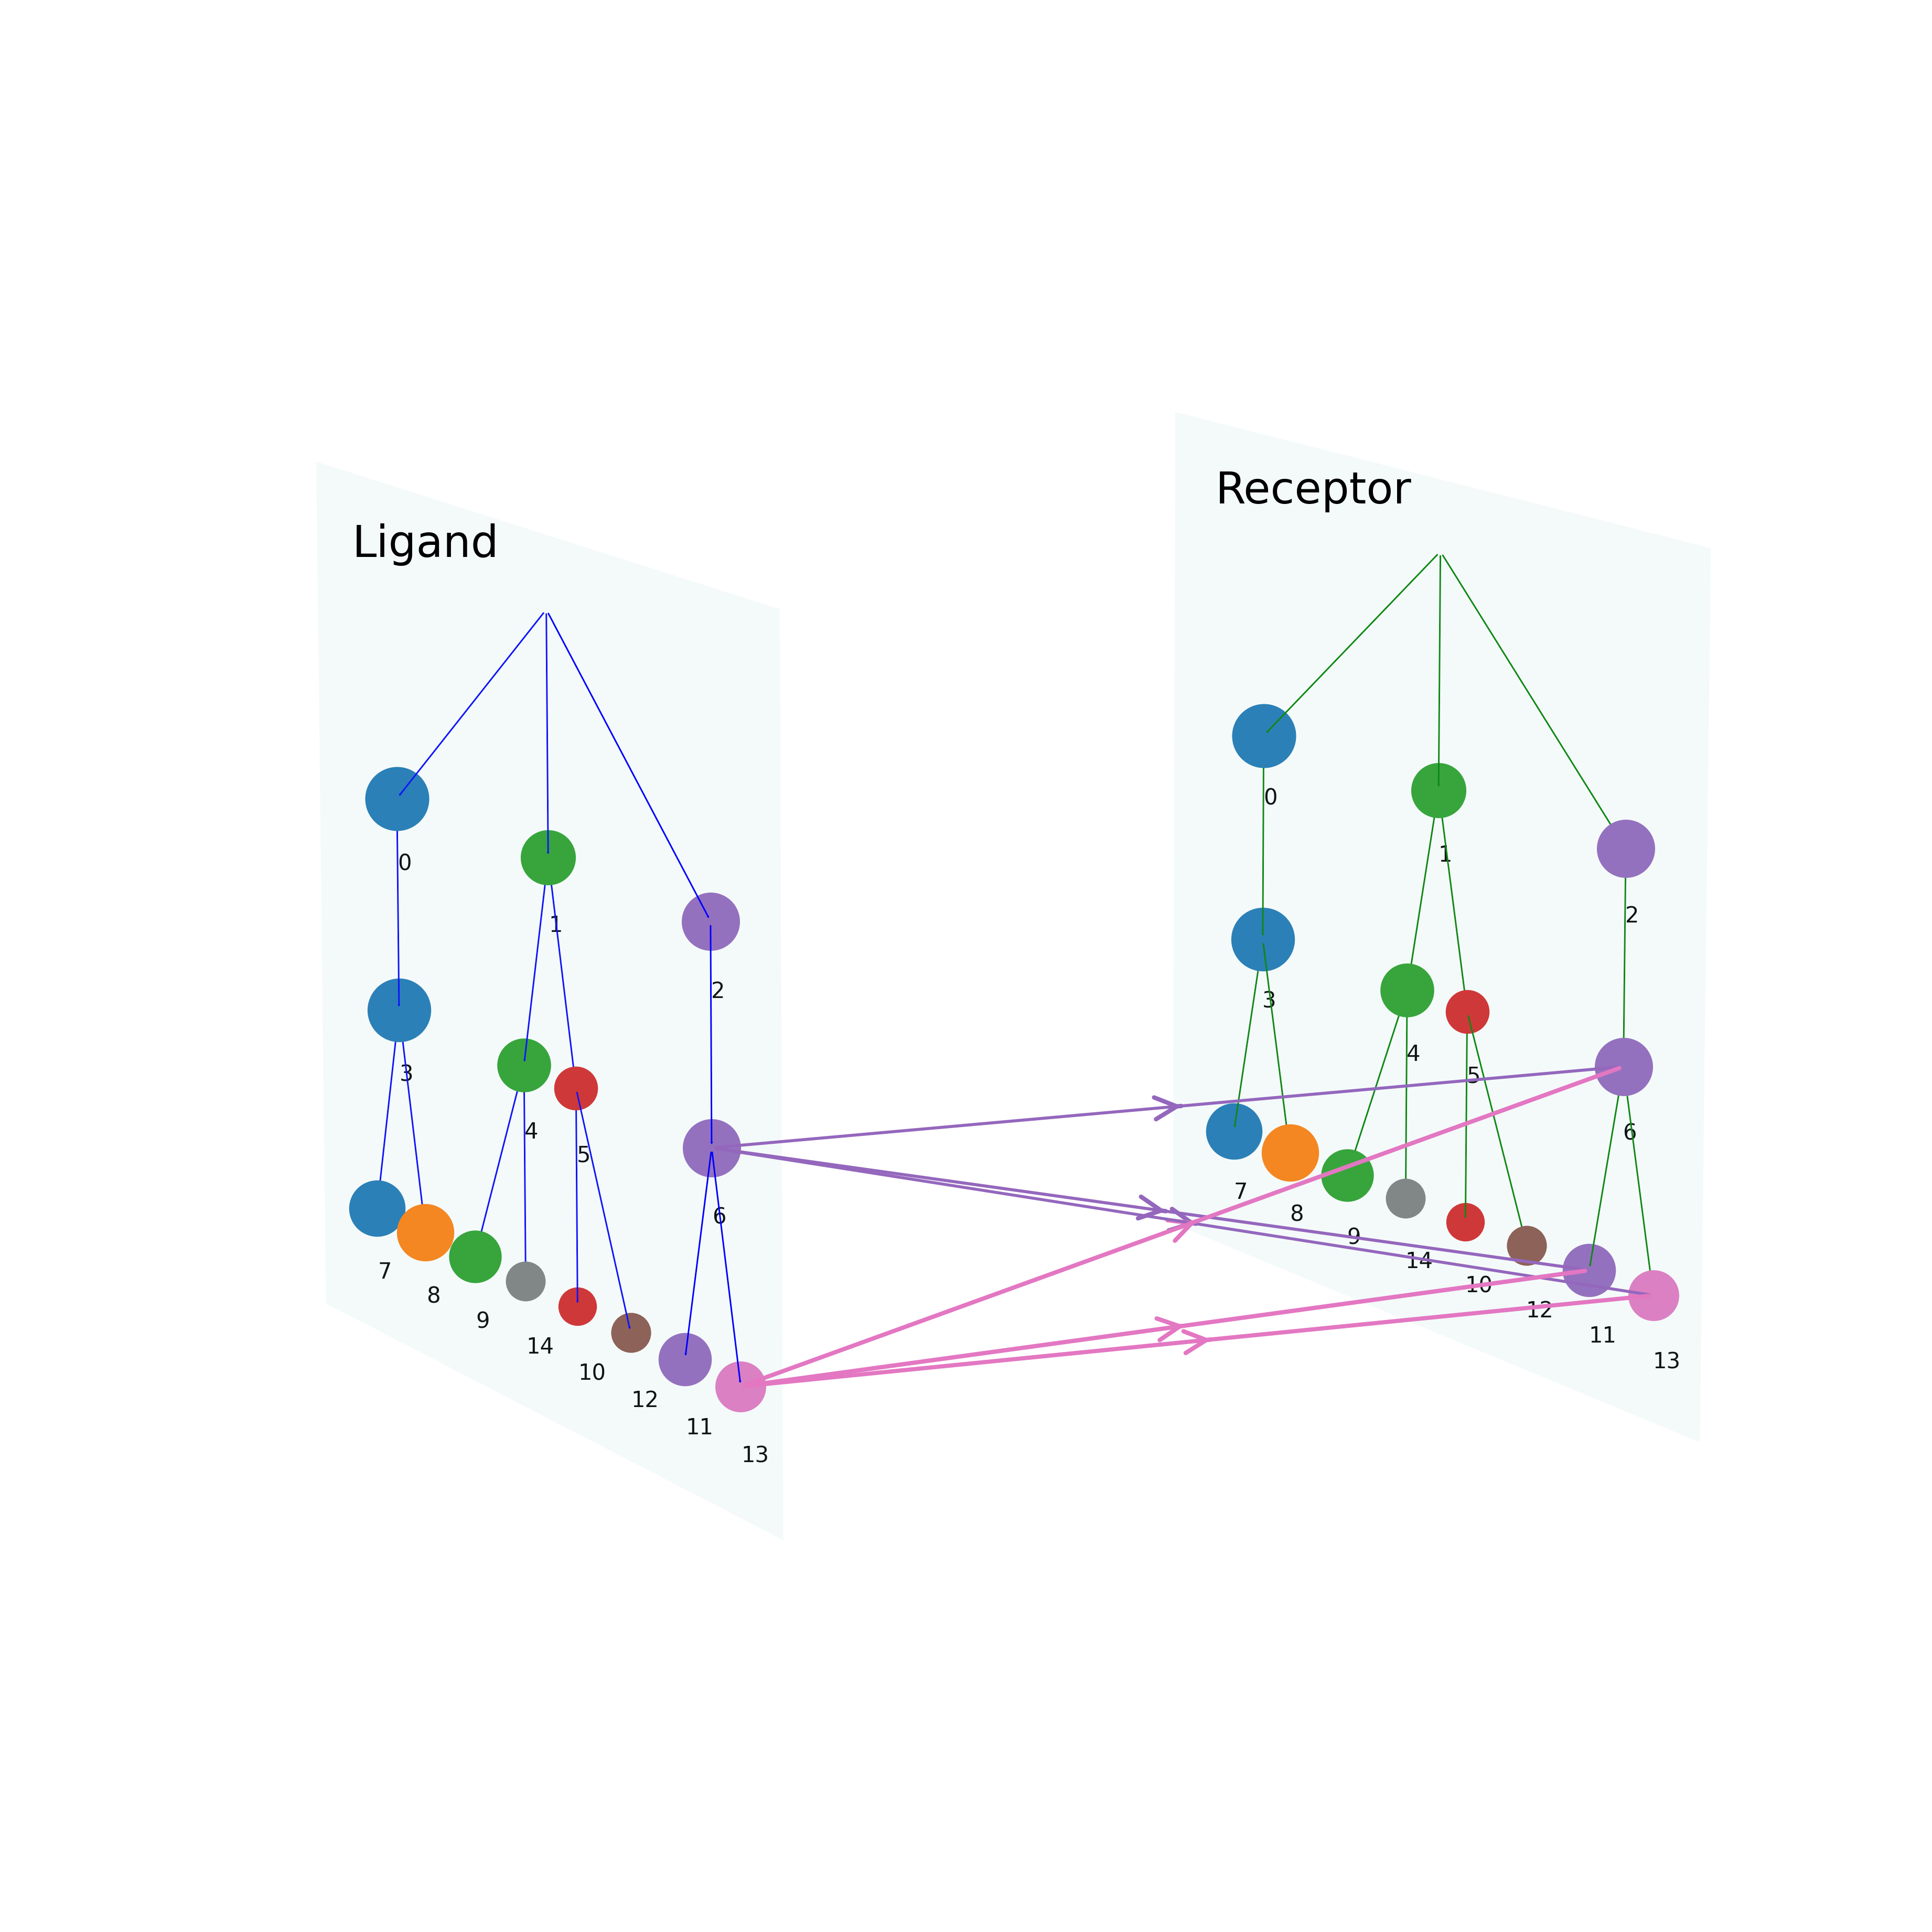

In [7]:
ccH_obj.Draw_CCC_LR(ligand=['CCL3'],receptor=['CCR1'],CCC_threshold=0.4)

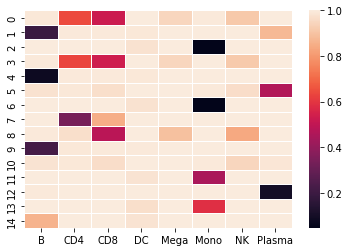

In [8]:
celltype_annotations = ccH_obj.adata.obs['annotations'].values
ccH_obj.jaccard_dist(ccH_obj.L_allresults['selected_comm_ids'],celltype_annotations)

### Cluster specific LR pairs

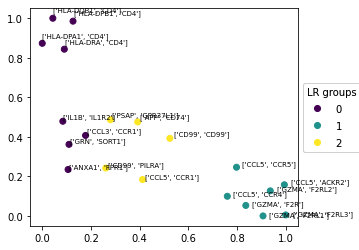

In [9]:
LR_ls = [[x[0],x[1]] for x in top20_specific_LR.iloc[0:20][['Ligand','Receptor']].values]
ccH_obj.Cluster_LRs(LR_ls)

### Draw CCC of pathways

In [10]:
active_pathways = ccH_obj.Detect_active_pathways()
pathway = 'GRN'
ccH_obj.Draw_CCC(pathway,CCC_threshold=0.2)

### Cluster pathways

In [11]:
ccH_obj.Cluster_pathways(nclusters=3)

### CrossChatH on spatial data
Once we detected multiscale clusters using spatial information, the rest of procedures are similar to those applied to scRNA-seq datasets.

100%|██████████| 100/100 [00:16<00:00,  5.92it/s]
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


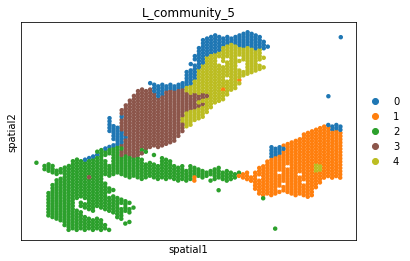

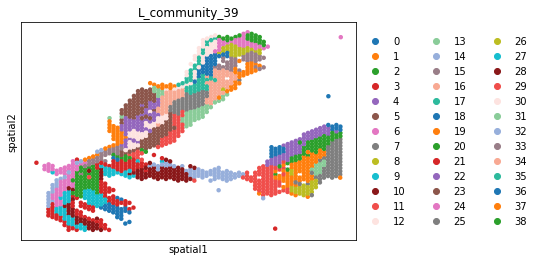

In [17]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_wounded_skin_PO7_visium.h5ad')
ccH_obj = cc.CrossChatH(adata,species="mouse")
ccH_obj.prepare_adata(normalize=True, scale=True, input='allgenes')
ccH_obj.Multsicale_clustering_spatial(cluster_by="allgenes")
ccH_obj.select_partitions(max_nvi=0.1, window_size=10, basin_radius=10, lr = "L")
ccH_obj.Draw_multiscale_umap("L",spatial=True)